## Netflix EDA

This notebook explores Netflix Movies & TV Shows dataset.  
It covers:
- Data cleaning and preprocessing
- Exploratory analysis
- Visualizations
- Key insights and recommendations

The dataset contains 12 columns including title, type, director, cast, country, release year, rating, duration, genres, and descriptions.


#### Import Libraries

In [21]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals in notebook
%matplotlib inline
sns.set_style('whitegrid')


#### Load Dataset
- We load the dataset netflix_titles.csv into a pandas DataFrame to explore and clean it. head() shows the first 5 rows.

In [23]:
# Load the dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Display first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Explore the Data

- We check the shape, column types, and missing values. This helps identify which columns need cleaning.

In [24]:
# Basic info
df.info()

# Summary statistics
df.describe(include='all')

# Check missing values
missing_summary = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percentage': df.isnull().sum() / len(df) * 100
}).sort_values(by='missing_percentage', ascending=False)

missing_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,missing_count,missing_percentage
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


## Data Cleaning

#### Standardize Column Name
Standardizing column names ensures consistent and easy access in Python.

In [25]:
df.columns = df.columns.str.lower().str.replace(' ','_')

#### Handling Mising Values
Based on the missing value check:

- director (**30%** missing), cast (**9%**), country (**9%**), and rating (**0.05%**) are filled with 'Unknown'.

- date_added has very few missing values (**10 entries, 0.1%**) → converting to datetime keeps them as NaT for clarity.

- duration has only 3 missing values → filled with 'Unknown' before processing.

Filling missing values ensures no rows are dropped unnecessarily and allows smooth analysis of trends, counts, and visualizations.

In [26]:
# Categorical columns with significant missing values
categorical_cols = ['director', 'cast', 'country', 'rating']

# Fill missing values with 'Unknown'
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# Date column: fill missing as NaT (already converted to datetime)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Duration column: fill missing with 'Unknown' before splitting into numeric/unit
df['duration'] = df['duration'].fillna('Unknown')


#### Clean Duration Column
Duration values like '90 min' or '2 Seasons' are split into numeric (duration_int) and unit (duration_unit) for easier analysis.

In [27]:
# Function to split duration
def clean_duration(val):
    """
    Splits duration into numeric value and unit (minutes / seasons)
    Returns (numeric_value, unit) or (np.nan, None) if unknown
    """
    if val == 'Unknown':
        return np.nan, None
    try:
        num, unit = val.strip().split(' ')
        return int(num), unit
    except:
        return np.nan, None

# Apply function and expand into two columns
df[['duration_int', 'duration_unit']] = pd.DataFrame(df['duration'].apply(clean_duration).tolist(), index=df.index)


#### Remove Duplicates
Removind duplicates rows ensures accurate counts and statistics

In [28]:
df.drop_duplicates(inplace=True)

#### Extract Year Added
- Extracting the year helps analyze trends of content added over time.

In [29]:
df['year_added'] = df['date_added'].dt.year

## Exploratory Data Analysis (EDA)

#### Distribution of Movies vs TV Shows

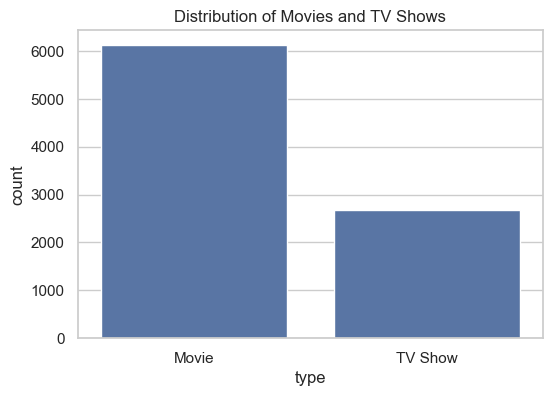

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title('Distribution of Movies and TV Shows')
plt.savefig('../images/movies_vs_tv.png', bbox_inches='tight')
plt.show()

#### Top Countries Producing Content

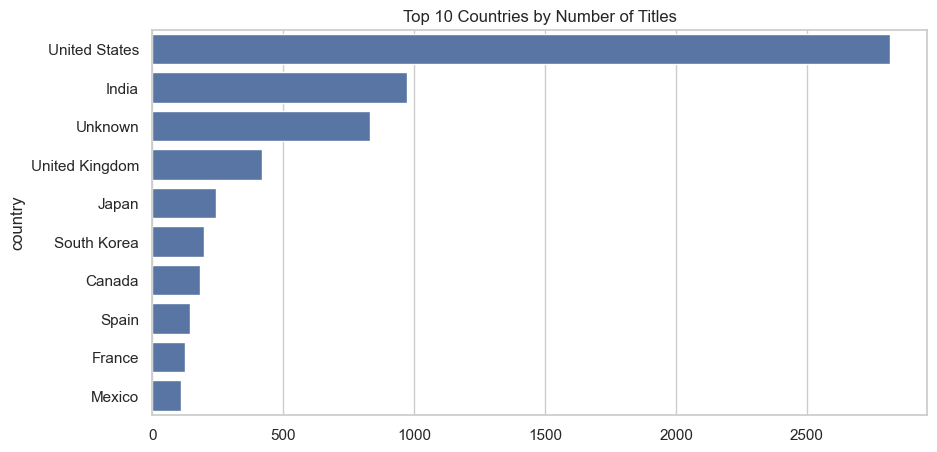

In [38]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Titles')
plt.savefig('../images/top_countries.png', bbox_inches='tight')
plt.show()

#### Most Common Ratings

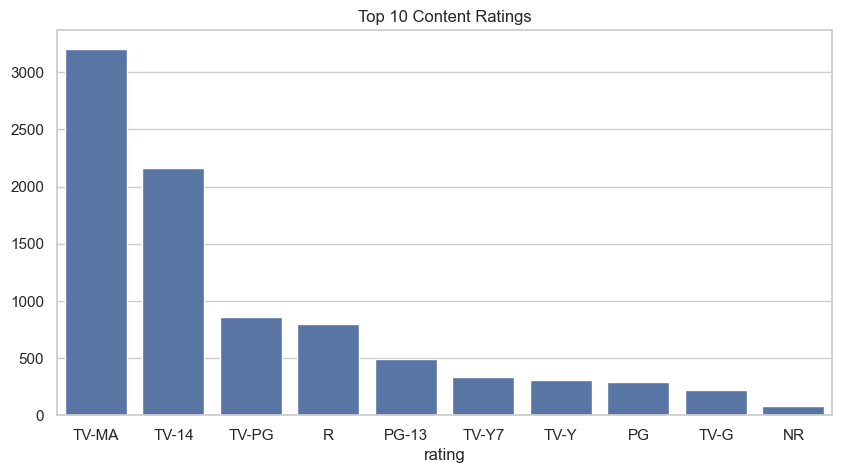

In [39]:
top_ratings = df['rating'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_ratings.index, y=top_ratings.values)
plt.title('Top 10 Content Ratings')
plt.savefig('../images/top_ratings.png', bbox_inches='tight')
plt.show()

#### Duration Analysis

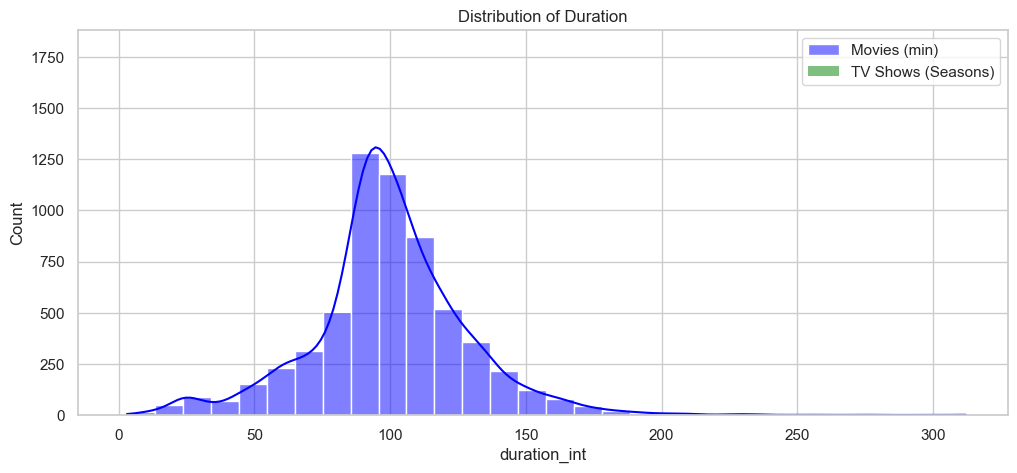

In [40]:
# Separate Movies and TV Shows
movie_durations = df[df['duration_unit']=='min']['duration_int']
tv_durations = df[df['duration_unit']=='Season']['duration_int']

plt.figure(figsize=(12,5))
sns.histplot(movie_durations.dropna(), bins=30, kde=True, color='blue', label='Movies (min)')
sns.histplot(tv_durations.dropna(), bins=30, kde=True, color='green', label='TV Shows (Seasons)')
plt.legend()
plt.title('Distribution of Duration')
plt.savefig('../images/duration_distribution.png', bbox_inches='tight')
plt.show()

#### Titles Added Over the Years

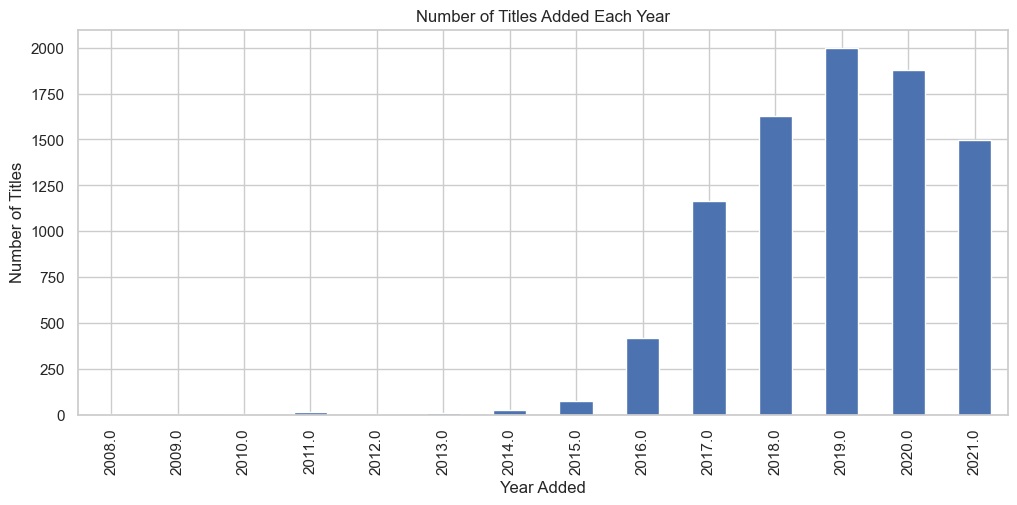

In [41]:
plt.figure(figsize=(12,5))
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Titles Added Each Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.savefig('../images/titles_added_per_year.png', bbox_inches='tight')
plt.show()

## Save Cleaned Data

In [42]:
df.to_csv('../data/netflix_titles_cleaned.csv', index=False)